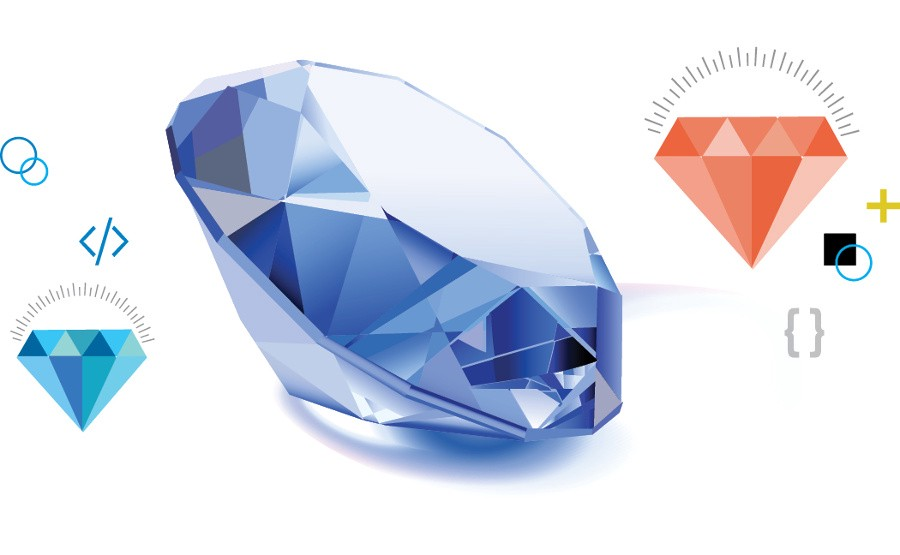

Precious stones like diamond are in high demand in the investment market due to their monetary rewards. Thus, it is of utmost importance to the diamond dealers to predict the accurate price. However, the prediction process is difficult due to the wide variation in the diamond stones sizes and characteristics. Several machine learning algorithms were used to help in predicting diamond price, among them Liner regression, Random forest regression, polynomial regression, Gradient descent and Neural network. Here I have used linear regression for diamond price predicton.

## Changing Directory

In [1]:
import os
os.chdir(r'C:\Users\praka\OneDrive\Desktop\METRO\DATA_MINNING\DMSAM_PROJECT\LINEAR_REGRESSION\diamonds.csv')
os.getcwd()

'C:\\Users\\praka\\OneDrive\\Desktop\\METRO\\DATA_MINNING\\DMSAM_PROJECT\\LINEAR_REGRESSION\\diamonds.csv'

## Import Packages

In [2]:

# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 


# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns



## Import Data

In [3]:
df= pd.read_csv('diamonds.csv')


df.info()

In [4]:
#data descrition
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


A five-number summary is especially useful in descriptive analyses or during the preliminary investigation of a 
large data set. A summary consists of five values: the most extreme values in the data set 
(the maximum and minimum values), the lower and upper quartiles, and the median. 

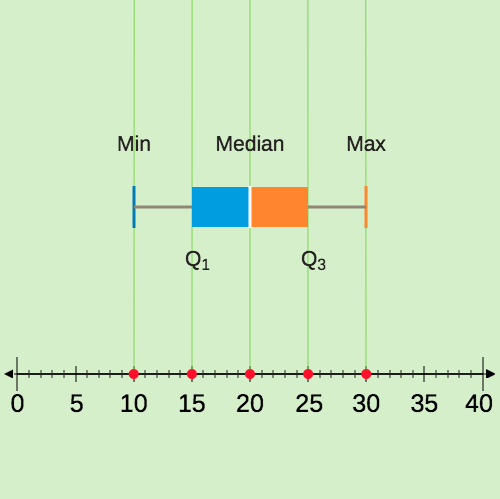

## Missing Values

In [5]:
# counting missing values
df.apply(lambda x: sum(x.isnull()))

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

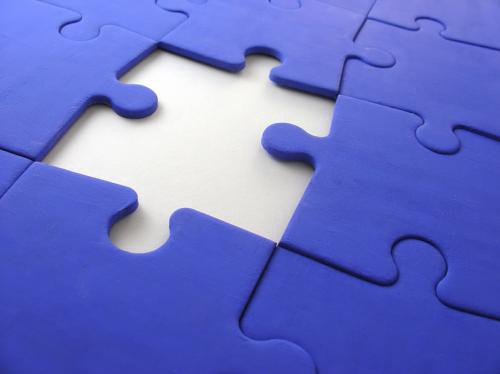

There is no missing values for this dataset

In [6]:
#Lets check Categorical variables & it's levels

In [7]:
df_cat = df.select_dtypes(include="object")
df_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [8]:
 df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
 df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
 df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## One Hot Encoding

In [11]:
dummies = pd.get_dummies(df[[
'cut',
'color',
'clarity']])

dummies.head()



,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


After encoding dataset seems to be all numerical.

To split the data into train & test we separate the target variable  price to y and other variales to X

In [12]:
#extract dependent and independent variables
X = df.drop(['price'],axis=1)
y = df.price

In [13]:
X.columns
X.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31


We join the encoded dummies to the dataframe & then drop those categorical features

In [14]:

X = pd.concat([X,dummies],axis=1)

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:

#Dropping insignificant features

In [16]:
X = X.drop(['cut','color','clarity'],axis=1)
X.head(2)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [17]:
#OLS is a common technique used in analyzing linear regression. 
#In brief, it compares the difference between individual points in your data set and the predicted best fit line 
#to measure the amount of error produced.

In [18]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:45:36   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3919.8378    270.210     14.507

In [19]:
X.columns
df1 = X[['y','z']]

df1.head(2)
df1.corr()

,y,z
y,1.000000,0.952006
z,0.952006,1.000000


In [20]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:45:40   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3995.9351    285.829     13.980

In [21]:
X2.corr()

,const,carat,depth,table,x,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,1.000000,0.028224,0.181618,0.975094,0.091844,0.034196,-0.163660,0.116245,0.009568,...,0.102465,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,NaN,0.028224,1.000000,-0.295779,-0.025289,0.280657,0.136114,-0.022778,-0.198306,0.025828,...,0.026037,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,NaN,0.181618,-0.295779,1.000000,0.195344,0.125332,0.175174,-0.549599,0.338072,0.119971,...,0.011574,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
x,NaN,0.975094,-0.025289,0.195344,1.000000,0.080644,0.030349,-0.162674,0.126820,0.004569,...,0.095896,0.164658,0.108361,-0.125976,0.079241,0.270827,-0.059882,-0.035507,-0.185253,-0.147151
cut_Fair,NaN,0.091844,0.280657,0.125332,0.080644,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,...,0.016646,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
cut_Good,NaN,0.034196,0.136114,0.175174,0.030349,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,...,-0.009517,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,NaN,-0.163660,-0.022778,-0.549599,-0.162674,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,...,-0.021264,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
cut_Premium,NaN,0.116245,-0.198306,0.338072,0.126820,-0.102801,-0.185385,-0.478074,1.000000,-0.314877,...,0.027895,0.017231,0.005676,-0.054013,0.023275,0.067623,-0.011866,0.022611,-0.053852,-0.061949
cut_Very Good,NaN,0.009568,0.025828,0.119971,0.004569,-0.094236,-0.169940,-0.438243,-0.314877,1.000000,...,-0.004437,0.009816,-0.031317,-0.033003,0.032547,0.004806,-0.006849,-0.016412,-0.005251,0.015284


<AxesSubplot:>

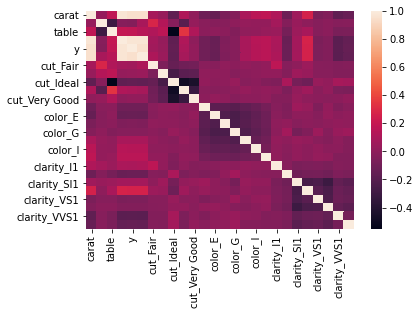

In [22]:
#Correlation in the X DataFrame
sns.heatmap(X.corr())

In [23]:

X.columns
df2 = X[['x','carat']]

df2.head(2)
df2.corr()

,x,carat
x,1.000000,0.975094
carat,0.975094,1.000000


We check the corrrelation of x & carat as they are highly correlated 

In [24]:
X.columns
df3 = df[['price','x','carat']]

df3.head(2)
df3.corr()

,price,x,carat
price,1.000000,0.884435,0.921591
x,0.884435,1.000000,0.975094
carat,0.921591,0.975094,1.000000


In [25]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [26]:
X = X.drop(['x','y','z'],axis=1)
X.head(2)



,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


We drop x,y,z as they are highly correlated.

In [27]:
X

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:45:55   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53919   BIC:                         9.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -660.5964    245.550     -2.690

CONCLUSION: Even after backward elemination the multicollinearity problems still exist we will check for other 
correlation between other variables to fix this problem

In [29]:
X2.corr()

,const,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,1.000000,0.028224,0.181618,0.091844,0.034196,-0.163660,0.116245,0.009568,-0.112057,...,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,NaN,0.028224,1.000000,-0.295779,0.280657,0.136114,-0.022778,-0.198306,0.025828,-0.013566,...,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,NaN,0.181618,-0.295779,1.000000,0.125332,0.175174,-0.549599,0.338072,0.119971,-0.008921,...,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
cut_Fair,NaN,0.091844,0.280657,0.125332,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,-0.012893,...,0.004770,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
cut_Good,NaN,0.034196,0.136114,0.175174,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,0.008909,...,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,NaN,-0.163660,-0.022778,-0.549599,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,0.014521,...,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
cut_Premium,NaN,0.116245,-0.198306,0.338072,-0.102801,-0.185385,-0.478074,1.000000,-0.314877,-0.016566,...,0.005899,0.017231,0.005676,-0.054013,0.023275,0.067623,-0.011866,0.022611,-0.053852,-0.061949
cut_Very Good,NaN,0.009568,0.025828,0.119971,-0.094236,-0.169940,-0.438243,-0.314877,1.000000,-0.000608,...,-0.001549,0.009816,-0.031317,-0.033003,0.032547,0.004806,-0.006849,-0.016412,-0.005251,0.015284
color_D,NaN,-0.112057,-0.013566,-0.008921,-0.012893,0.008909,0.014521,-0.016566,-0.000608,1.000000,...,-0.126699,-0.088817,-0.024545,-0.047418,0.057715,0.032017,-0.050134,0.021007,-0.046091,-0.015975


In [30]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.097e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:45:57   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53920   BIC:                         9.141e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -612.9513    282.727     -2.168   

In [31]:
X2.corr()

,const,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carat,NaN,1.000000,0.028224,0.181618,0.091844,0.034196,-0.163660,-0.112057,-0.139215,-0.060052,...,0.161494,0.180054,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,NaN,0.028224,1.000000,-0.295779,0.280657,0.136114,-0.022778,-0.013566,-0.028713,-0.017741,...,0.022630,0.022543,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,NaN,0.181618,-0.295779,1.000000,0.125332,0.175174,-0.549599,-0.008921,0.007172,-0.004906,...,0.017967,0.037253,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
cut_Fair,NaN,0.091844,0.280657,0.125332,1.000000,-0.055482,-0.143078,-0.012893,-0.019334,0.007763,...,0.004770,0.017257,0.175852,-0.027022,0.004587,0.055506,-0.022453,-0.027266,-0.039920,-0.030703
cut_Good,NaN,0.034196,0.136114,0.175174,-0.055482,1.000000,-0.258018,0.008909,0.007013,0.006949,...,0.006187,0.014977,0.015844,-0.033046,0.055938,0.041970,-0.017116,-0.021063,-0.037564,-0.038627
cut_Ideal,NaN,-0.163660,-0.022778,-0.549599,-0.143078,-0.258018,1.000000,0.014521,-0.001105,0.001351,...,-0.009225,-0.038490,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
color_D,NaN,-0.112057,-0.013566,-0.008921,-0.012893,0.008909,0.014521,1.000000,-0.178550,-0.175704,...,-0.126699,-0.088817,-0.024545,-0.047418,0.057715,0.032017,-0.050134,0.021007,-0.046091,-0.015975
color_E,NaN,-0.139215,-0.028713,0.007172,-0.019334,0.007013,-0.001105,-0.178550,1.000000,-0.218401,...,-0.157487,-0.110400,-0.013462,-0.044863,0.005953,0.005514,-0.027238,0.027954,-0.001502,0.011683
color_F,NaN,-0.060052,-0.017741,-0.004906,0.007763,0.006949,0.001351,-0.175704,-0.218401,1.000000,...,-0.154977,-0.108640,0.004974,0.018539,-0.020436,-0.002251,-0.011038,0.003775,0.016901,0.013128


<AxesSubplot:>

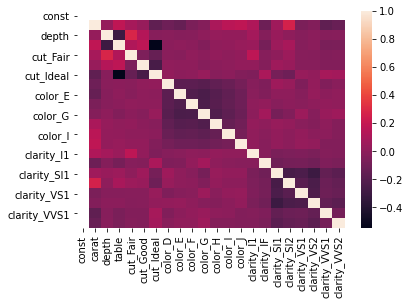

In [32]:
#Correlation in the X DataFrame
sns.heatmap(X2.corr())

In [33]:
X.columns

Index(['carat', 'depth', 'table', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

To resolve multicollinearity issue exploring each category which is one hot encoded with the significant 
variable which is highly correlated to targe variable.

In [34]:
X.columns
df4 = X[['cut_Fair', 'cut_Good', 'cut_Ideal','cut_Premium', 'cut_Very Good','carat']]

df4.head(2)
df4.corr()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,carat
cut_Fair,1.000000,-0.055482,-0.143078,-0.102801,-0.094236,0.091844
cut_Good,-0.055482,1.000000,-0.258018,-0.185385,-0.169940,0.034196
cut_Ideal,-0.143078,-0.258018,1.000000,-0.478074,-0.438243,-0.163660
cut_Premium,-0.102801,-0.185385,-0.478074,1.000000,-0.314877,0.116245
cut_Very Good,-0.094236,-0.169940,-0.438243,-0.314877,1.000000,0.009568
carat,0.091844,0.034196,-0.163660,0.116245,0.009568,1.000000


<AxesSubplot:>

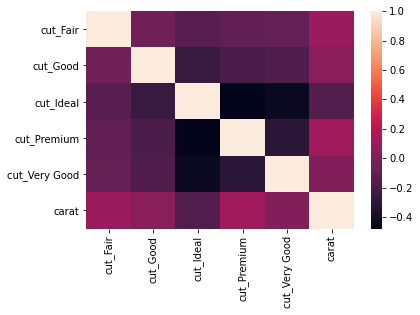

In [35]:
#Correlation in the X DataFrame
sns.heatmap(df4.corr())

Here we can see 'cut_Fair', 'cut_Good','cut_Premium', 'cut_Very Good' have a  correlation around 0.2 with 'carat' 
but cut_Ideal less than 0.2 correlation with carat. hence we drop ('cut_Fair', 'cut_Good','cut_Premium', 'cut_Very Good')
all these variables & go forward with cut_Fair for linear regression.


In [36]:
X = X.drop(['cut_Fair', 'cut_Good','cut_Premium', 'cut_Very Good'],axis=1)
X.head(2)

,carat,depth,table,cut_Ideal,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 3.417e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:46:13   Log-Likelihood:            -4.5728e+05
No. Observations:               53940   AIC:                         9.146e+05
Df Residuals:                   53922   BIC:                         9.147e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1833.1447    266.531      6.878   

Here it is observed still there ia a problem of multicollinearity.Hence we explore the other highly correlated variables.

In [38]:
X.columns
df5 = X[['color_D', 'color_E', 'color_F','color_G', 'color_H', 'color_I', 'color_J','carat']]

df5.head(2)
df5.corr()

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat
color_D,1.000000,-0.178550,-0.175704,-0.195021,-0.161672,-0.126699,-0.088817,-0.112057
color_E,-0.178550,1.000000,-0.218401,-0.242411,-0.200958,-0.157487,-0.110400,-0.139215
color_F,-0.175704,-0.218401,1.000000,-0.238547,-0.197755,-0.154977,-0.108640,-0.060052
color_G,-0.195021,-0.242411,-0.238547,1.000000,-0.219496,-0.172014,-0.120584,-0.029038
color_H,-0.161672,-0.200958,-0.197755,-0.219496,1.000000,-0.142600,-0.099964,0.102465
color_I,-0.126699,-0.157487,-0.154977,-0.172014,-0.142600,1.000000,-0.078339,0.161494
color_J,-0.088817,-0.110400,-0.108640,-0.120584,-0.099964,-0.078339,1.000000,0.180054
carat,-0.112057,-0.139215,-0.060052,-0.029038,0.102465,0.161494,0.180054,1.000000


<AxesSubplot:>

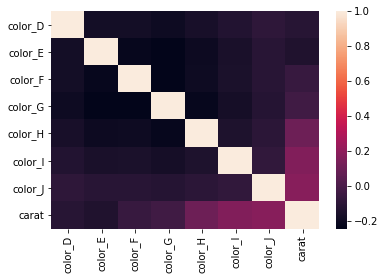

In [39]:
#Correlation in the X DataFrame
sns.heatmap(df5.corr())

Here it can be observed that 'color_H', 'color_I', 'color_J' have correlation between 0.2 or slightly lower 
for color_H with carat hence we drop those variables & check for multicollinearity.

In [40]:
X = X.drop(['color_H', 'color_I', 'color_J'],axis=1)
X.head(2)

,carat,depth,table,cut_Ideal,color_D,color_E,color_F,color_G,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [41]:
X.corr()

,carat,depth,table,cut_Ideal,color_D,color_E,color_F,color_G,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028224,0.181618,-0.163660,-0.112057,-0.139215,-0.060052,-0.029038,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.295779,-0.022778,-0.013566,-0.028713,-0.017741,0.002768,0.081135,-0.030881,0.040899,0.007202,-0.024169,-0.009459,-0.023477,-0.019243
table,0.181618,-0.295779,1.000000,-0.549599,-0.008921,0.007172,-0.004906,-0.038815,0.044716,-0.078766,0.051959,0.095344,-0.026858,-0.009655,-0.069103,-0.062273
cut_Ideal,-0.163660,-0.022778,-0.549599,1.000000,0.014521,-0.001105,0.001351,0.034649,-0.048795,0.104986,-0.082865,-0.108242,0.034247,0.015669,0.088354,0.075508
color_D,-0.112057,-0.013566,-0.008921,0.014521,1.000000,-0.178550,-0.175704,-0.195021,-0.024545,-0.047418,0.057715,0.032017,-0.050134,0.021007,-0.046091,-0.015975
color_E,-0.139215,-0.028713,0.007172,-0.001105,-0.178550,1.000000,-0.218401,-0.242411,-0.013462,-0.044863,0.005953,0.005514,-0.027238,0.027954,-0.001502,0.011683
color_F,-0.060052,-0.017741,-0.004906,0.001351,-0.175704,-0.218401,1.000000,-0.238547,0.004974,0.018539,-0.020436,-0.002251,-0.011038,0.003775,0.016901,0.013128
color_G,-0.029038,0.002768,-0.038815,0.034649,-0.195021,-0.242411,-0.238547,1.000000,-0.002006,0.077917,-0.080738,-0.045651,0.055601,-0.023829,0.042398,0.059744
clarity_I1,0.120983,0.081135,0.044716,-0.048795,-0.024545,-0.013462,0.004974,-0.002006,1.000000,-0.021865,-0.066724,-0.053497,-0.049867,-0.064002,-0.031819,-0.037997
clarity_IF,-0.114449,-0.030881,-0.078766,0.104986,-0.047418,-0.044863,0.018539,0.077917,-0.021865,1.000000,-0.104743,-0.083980,-0.078280,-0.100470,-0.049949,-0.059648


In [42]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.663e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:46:25   Log-Likelihood:            -4.5864e+05
No. Observations:               53940   AIC:                         9.173e+05
Df Residuals:                   53924   BIC:                         9.175e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1848.8721    308.326      5.996   

From this result it is observed that there is feature 'clarity_SI1' having p-value higher than significance value.
Hence we drop it with backward feature elimination.

In [43]:
#backward feature elimination
while (lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 3.663e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:46:26   Log-Likelihood:            -4.5864e+05
No. Observations:               53940   AIC:                         9.173e+05
Df Residuals:                   53924   BIC:                         9.175e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1873.5473    347.092      5.398   

Still we can see there is problem of multi collinearity so we continue to check collinearity with other variables.

In [44]:
X.columns
df6 = X[['clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2','clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2','carat']]

df6.head(2)
df6.corr()

,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat
clarity_I1,1.000000,-0.021865,-0.066724,-0.053497,-0.049867,-0.064002,-0.031819,-0.037997,0.120983
clarity_IF,-0.021865,1.000000,-0.104743,-0.083980,-0.078280,-0.100470,-0.049949,-0.059648,-0.114449
clarity_SI1,-0.066724,-0.104743,1.000000,-0.256272,-0.238879,-0.306592,-0.152423,-0.182020,0.062669
clarity_SI2,-0.053497,-0.083980,-0.256272,1.000000,-0.191526,-0.245816,-0.122208,-0.145938,0.267483
clarity_VS1,-0.049867,-0.078280,-0.238879,-0.191526,1.000000,-0.229133,-0.113914,-0.136033,-0.063094
clarity_VS2,-0.064002,-0.100470,-0.306592,-0.245816,-0.229133,1.000000,-0.146204,-0.174594,-0.038904
clarity_VVS1,-0.031819,-0.049949,-0.152423,-0.122208,-0.113914,-0.146204,1.000000,-0.086800,-0.167571
clarity_VVS2,-0.037997,-0.059648,-0.182020,-0.145938,-0.136033,-0.174594,-0.086800,1.000000,-0.137024
carat,0.120983,-0.114449,0.062669,0.267483,-0.063094,-0.038904,-0.167571,-0.137024,1.000000


<AxesSubplot:>

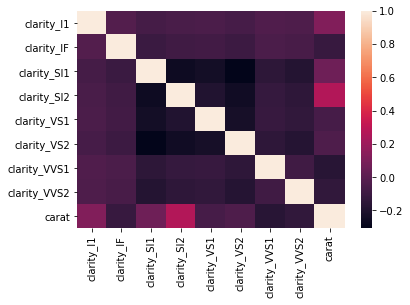

In [45]:
sns.heatmap(df6.corr())

Here it is observed 'clarity_SI2' has correlation of 0.2 with 'carat' variables 'clarity_I1' & 'clarity_SI1' 
has correlation above 0.2 to 0.4 with 'carat'.Hence we drop these variables.

In [46]:
X = X.drop(['clarity_I1','clarity_SI1', 'clarity_SI2'],axis=1)
X.head(2)

,carat,depth,table,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,1,0,1,0,0,0,0,0,0,0
1,0.21,59.8,61.0,0,0,1,0,0,0,0,0,0,0


In [47]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 3.593e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:49:43   Log-Likelihood:            -4.6260e+05
No. Observations:               53940   AIC:                         9.252e+05
Df Residuals:                   53926   BIC:                         9.254e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3360.8839    372.397      9.025   

Still we can see there is problem of multi collinearity so we continue to check collinearity with other variables.

In [48]:
X.columns
df7 = X[['table','carat']]
df7.head(2)
df7.corr()

,table,carat
table,1.000000,0.181618
carat,0.181618,1.000000


<AxesSubplot:>

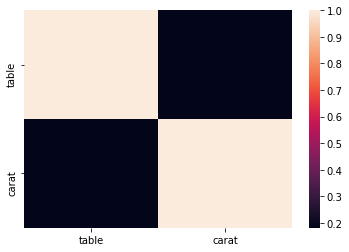

In [49]:
sns.heatmap(df7.corr())

Here it is observed that table has correlation of 0.181618 with 'carat'.Wedrop it as other variables have negative 
correlation with 'carat' & this yet positive not significant though but we drop to resolve multicollinearity.

In [50]:
X = X.drop(['table'],axis=1)
X.head(2)

,carat,depth,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,1,0,1,0,0,0,0,0,0,0
1,0.21,59.8,0,0,1,0,0,0,0,0,0,0


In [51]:
X.corr()

,carat,depth,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,0.028224,-0.163660,-0.112057,-0.139215,-0.060052,-0.029038,-0.114449,-0.063094,-0.038904,-0.167571,-0.137024
depth,0.028224,1.000000,-0.022778,-0.013566,-0.028713,-0.017741,0.002768,-0.030881,-0.024169,-0.009459,-0.023477,-0.019243
cut_Ideal,-0.163660,-0.022778,1.000000,0.014521,-0.001105,0.001351,0.034649,0.104986,0.034247,0.015669,0.088354,0.075508
color_D,-0.112057,-0.013566,0.014521,1.000000,-0.178550,-0.175704,-0.195021,-0.047418,-0.050134,0.021007,-0.046091,-0.015975
color_E,-0.139215,-0.028713,-0.001105,-0.178550,1.000000,-0.218401,-0.242411,-0.044863,-0.027238,0.027954,-0.001502,0.011683
color_F,-0.060052,-0.017741,0.001351,-0.175704,-0.218401,1.000000,-0.238547,0.018539,-0.011038,0.003775,0.016901,0.013128
color_G,-0.029038,0.002768,0.034649,-0.195021,-0.242411,-0.238547,1.000000,0.077917,0.055601,-0.023829,0.042398,0.059744
clarity_IF,-0.114449,-0.030881,0.104986,-0.047418,-0.044863,0.018539,0.077917,1.000000,-0.078280,-0.100470,-0.049949,-0.059648
clarity_VS1,-0.063094,-0.024169,0.034247,-0.050134,-0.027238,-0.011038,0.055601,-0.078280,1.000000,-0.229133,-0.113914,-0.136033
clarity_VS2,-0.038904,-0.009459,0.015669,0.021007,0.027954,0.003775,-0.023829,-0.100470,-0.229133,1.000000,-0.146204,-0.174594


In [52]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 3.874e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:53:31   Log-Likelihood:            -4.6272e+05
No. Observations:               53940   AIC:                         9.255e+05
Df Residuals:                   53927   BIC:                         9.256e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1043.3849    241.297     -4.324   

Still we can see there is problem of multi collinearity so we continue to check collinearity with other variables.

In [54]:
X.columns
df8 = X[['depth','carat']]
df8.head(2)
df8.corr()

,depth,carat
depth,1.000000,0.028224
carat,0.028224,1.000000


<AxesSubplot:>

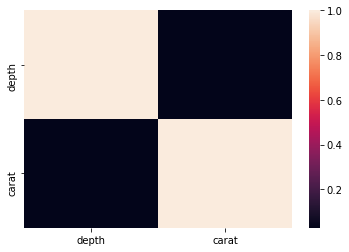

In [55]:
sns.heatmap(df8.corr())

Here it is observed that depth has correlation of 0.028224 with 'carat'.Wedrop it as other variables have negative 
correlation with 'carat' & this yet positive not significant though but we drop to resolve multicollinearity.

In [58]:
X = X.drop(['depth'],axis=1)
X.head(2)

,carat,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,1,0,1,0,0,0,0,0,0,0
1,0.21,0,0,1,0,0,0,0,0,0,0


In [59]:
X.corr()

,carat,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,1.000000,-0.163660,-0.112057,-0.139215,-0.060052,-0.029038,-0.114449,-0.063094,-0.038904,-0.167571,-0.137024
cut_Ideal,-0.163660,1.000000,0.014521,-0.001105,0.001351,0.034649,0.104986,0.034247,0.015669,0.088354,0.075508
color_D,-0.112057,0.014521,1.000000,-0.178550,-0.175704,-0.195021,-0.047418,-0.050134,0.021007,-0.046091,-0.015975
color_E,-0.139215,-0.001105,-0.178550,1.000000,-0.218401,-0.242411,-0.044863,-0.027238,0.027954,-0.001502,0.011683
color_F,-0.060052,0.001351,-0.175704,-0.218401,1.000000,-0.238547,0.018539,-0.011038,0.003775,0.016901,0.013128
color_G,-0.029038,0.034649,-0.195021,-0.242411,-0.238547,1.000000,0.077917,0.055601,-0.023829,0.042398,0.059744
clarity_IF,-0.114449,0.104986,-0.047418,-0.044863,0.018539,0.077917,1.000000,-0.078280,-0.100470,-0.049949,-0.059648
clarity_VS1,-0.063094,0.034247,-0.050134,-0.027238,-0.011038,0.055601,-0.078280,1.000000,-0.229133,-0.113914,-0.136033
clarity_VS2,-0.038904,0.015669,0.021007,0.027954,0.003775,-0.023829,-0.100470,-0.229133,1.000000,-0.146204,-0.174594
clarity_VVS1,-0.167571,0.088354,-0.046091,-0.001502,0.016901,0.042398,-0.049949,-0.113914,-0.146204,1.000000,-0.086800


In [60]:
#importing OLS statsmodel to check the p-values of the X variable
import statsmodels.api as sm
X2 = sm.add_constant(X) #to account for b0
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 4.207e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        18:56:41   Log-Likelihood:            -4.6283e+05
No. Observations:               53940   AIC:                         9.257e+05
Df Residuals:                   53928   BIC:                         9.258e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4572.2697     19.447   -235.115   

CONCLUSION : Here after dropping variables having collinearity  range between (0.975094 to 0.181618) there is no multicollinearity issue between the variables.So we can say that these variables carat,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2 are significant to predict diamond prices.


In [61]:
X=X2.drop('const',axis=1) #we dont need constant column for sklearn package
X.head()

,carat,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,1,0,1,0,0,0,0,0,0,0
1,0.21,0,0,1,0,0,0,0,0,0,0
2,0.23,0,0,1,0,0,0,1,0,0,0
3,0.29,0,0,0,0,0,0,0,1,0,0
4,0.31,0,0,0,0,0,0,0,0,0,0


In [62]:
#For cross-validation using train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8954943203323933

## Accuracy Metrics

In [64]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print('R-square :',r2_score(y_test,y_pred)) #R^2
print('MSE      :',mean_squared_error(y_test,y_pred)) #MSE
print('RMSE     :',math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

R-square : 0.8954943203323933
MSE      : 1623862.7585040645
RMSE     : 1274.3087375138196


In [73]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

-2.401187484260587

Here my cross validation score is negative -2.401187484260587

In [76]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv).mean()

0.8966763170568424

But we can shuffle cv and check the accuracy. It gives 
0.8966763170568424 after shuffling.

In [66]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [67]:
model.intercept_

-4572.269739566451

In [68]:
model.coef_

array([8615.87313213,  230.91829231, 1314.46964678, 1081.02048703,
        981.20144717,  794.41575231, 2266.38025029, 1389.67447993,
       1091.6801377 , 1930.67477858, 1830.34198552])

In [69]:
#dimensions of data
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
R2

0.8954943203323933

In [70]:
#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.8953876423000674


INFERENCES : Here B0 = -969.6610935703889 

Price=-969.66+8615.87*carat+230.91*cut_Ideal+1314.46color_D+1081.020*color_E+981.20*color_F+794.41*color_G+2266.38*clarity_IF+1389.67*clarity_VS1+1091.68*clarity_VS2+1930.67*clarity_VVS1+1830.341*clarity_VVS2
        
Dropped insignificant variables which may x,y,z & also these values were highly correlated to each other causing multicollinearity & ,cut_Premium,cut_Very_Good had p-values higher than significance level.
Variables like 'clarity_I1','clarity_SI1', 'clarity_SI2','color_H', 'color_I', 'color_J','cut_Fair', 'cut_Good','cut_Premium', 'cut_Very Good' were also correlated carat.

CONCLUSION:
Here after dropping variables having collinearity  range between (0.975094 to 0.181618) there is no multicollinearity issue between the variables.So we can say that these variables carat,cut_Ideal,color_D,color_E,color_F,color_G,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2 are significant to predict diamond prices.

R2       : 0.8954943203323933
Adj_R2   : 0.8953876423000674 
RMSE     : 1133.6178795556625
cross_val: 0.8966763170568424

From the above accuracy metrics I can conclude moel is a good fit.
